# Fit a Polynomial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

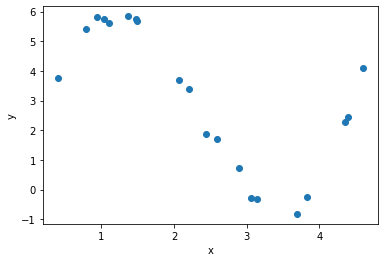

In [31]:
url = 'https://raw.githubusercontent.com/BolunDai0216/nyuMLSummerSchool/master/day03/polyfit_data.csv'
df = pd.read_csv(url)
x = df['x'].values
y = df['y'].values
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Exercice :
1) Compute the Design matrix :
$ \begin{bmatrix} 1 & x_{1} & x_{1}^2 & \cdots & x_{1}^M \\ 1 & x_{2} &
    x_{2}^2 & \cdots & x_{2}^M \\ \vdots & & \ddots & & \vdots \\ 1 & x_{N} & x_{N}^2 & \cdots & x_{N}^M \end{bmatrix}$

2) Compute the Least-Square solution : $\mathbf{w} = (X^TX)^{-1}X^TY$

3) Compute the MSE

4) Make a prediction for xplt = np.linspace(0, 5, 100) and plot your polynomial over the data points

5) Try to find the "best" value for M

MSE: 0.031675887665315844


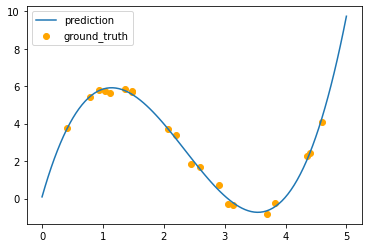

In [60]:
# Choose any integer value for M
M = 5

# To-do
def design_matrix(x, M):
    # To-do
    x = x.reshape(-1, 1)
    Design_Matrix = np.power(x, np.arange(M))
    return Design_Matrix

X = design_matrix(x, M)
y = y.reshape(-1, 1)
w = np.linalg.inv(X.T@X)@X.T@y
yhat = X@w

MSE = np.mean((yhat - y)**2)
print("MSE: {}".format(MSE))

xplt = np.linspace(0, 5, 100)
yplt = design_matrix(xplt, M)@w

plt.figure()
plt.plot(xplt, yplt, label="prediction")
plt.scatter(x, y, color="orange", label="ground_truth")
plt.legend()
plt.show()

# Bonus :

Reproduce your code with sklearn !

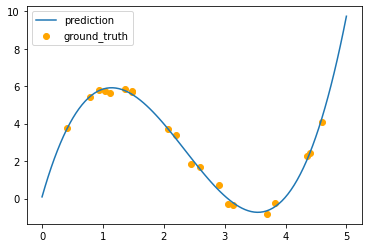

In [58]:
from sklearn import linear_model

# To-do
regr = linear_model.LinearRegression()
regr.fit(X, y)
yplt = regr.predict(design_matrix(xplt, M))

plt.figure()
plt.plot(xplt, yplt, label="prediction")
plt.scatter(x, y, color="orange", label="ground_truth")
plt.legend()
plt.show()